In [1]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_e161d40bff6e4cd0bcddc04f6bf63856 = 'https://s3.eu.cloud-object-storage.appdomain.cloud'
else:
    endpoint_e161d40bff6e4cd0bcddc04f6bf63856 = 'https://s3.private.eu.cloud-object-storage.appdomain.cloud'

client_e161d40bff6e4cd0bcddc04f6bf63856 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_e161d40bff6e4cd0bcddc04f6bf63856)

body = client_e161d40bff6e4cd0bcddc04f6bf63856.get_object(Bucket='',Key='matches.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

In [2]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
# For exporting dataframes into CSV files
from project_lib import Project
project = Project(project_id='', project_access_token='')
pc = project.project_context

In [3]:
matches= pd.read_csv(body)
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05/04/17,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06/04/17,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07/04/17,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08/04/17,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08/04/17,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# 1) Most Number of Wins

In [9]:
teams_with_most_number_of_wins=matches.winner.mode()
teams_with_most_number_of_wins

0    Mumbai Indians
dtype: object

In [11]:
x=matches.groupby('winner')['winner'].count().sort_values(ascending=False)
y=x.index
z=x.values
x = x.reset_index(name="count")
x['count']=x['count'].astype(int)
x=x[0:5]
x
project.save_data(file_name='most_number_of_wins1.csv',data=x.to_csv())

{'file_name': 'most_number_of_wins1.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'ibmhc2021-donotdelete-pr-b4rupmtzwrnsav',
 'asset_id': 'df918b66-aae2-4460-80f8-159e31833544'}

In [15]:
from matplotlib import pyplot as plt

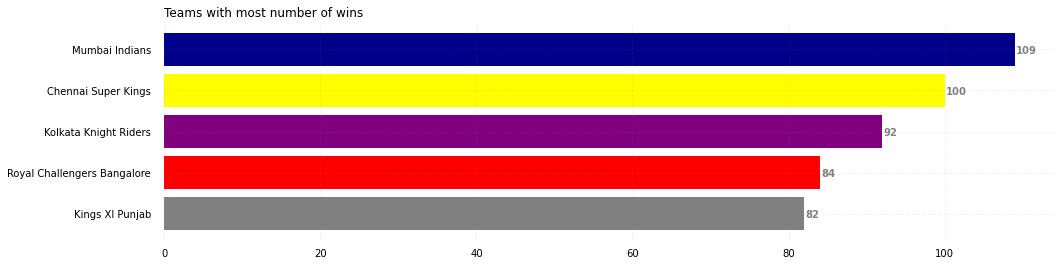

In [16]:
row = y[0:5]
column = z[0:5]
 

fig, ax = plt.subplots(figsize =(16, 4))
 

ax.barh(row, column,color=['darkblue', 'yellow', 'purple', 'red','grey'])
 

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,str(round((i.get_width()), 2)),fontsize = 10, fontweight ='bold',color ='grey')
 

ax.set_title('Teams with most number of wins',loc ='left')
plt.show()

# 2) Least Number of Wins

In [13]:
x=matches.groupby('winner')['winner'].count().sort_values(ascending=True)
y=x.index
z=x.values
x = x.reset_index(name="count")
x['count']=x['count'].astype(int)
x=x[0:5]
x
project.save_data(file_name='least_number_of_wins1.csv',data=x.to_csv())

{'file_name': 'least_number_of_wins1.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'ibmhc2021-donotdelete-pr-b4rupmtzwrnsav',
 'asset_id': 'f0a994dd-115b-4db9-b7e2-ff20b7372488'}

In [19]:
print("Least number of wins:",y[0],"with",z[0],"wins")

Least number of wins: Kochi Tuskers Kerala with 6 wins


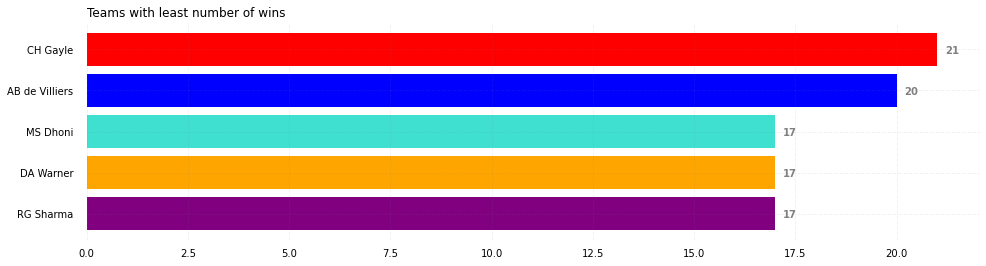

In [11]:
from matplotlib import pyplot as plt
row = y[0:5]
column = z[0:5]
 

fig, ax = plt.subplots(figsize =(16, 4))
 

ax.barh(row, column,color=['red', 'blue', 'turquoise', 'orange','purple'])
 

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,str(round((i.get_width()), 2)),fontsize = 10, fontweight ='bold',color ='grey')
 

ax.set_title('Teams with least number of wins',loc ='left')
plt.show()

# 3) Maximum Number of Man of the Matches

In [21]:
player_with_most_number_of_man_of_the_matches=matches.player_of_match.mode()
player_with_most_number_of_man_of_the_matches

0    CH Gayle
dtype: object

In [5]:
x=matches.groupby('player_of_match')['player_of_match'].count().sort_values(ascending=False)
y=x.index
z=x.values
x = x.reset_index(name="count")
x['count']=x['count'].astype(int)
x=x[0:10]
x
project.save_data(file_name='maximum_no_of_man_of_the_matches.csv',data=x.to_csv())

{'file_name': 'maximum_no_of_man_of_the_matches.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'ibmhc2021-donotdelete-pr-b4rupmtzwrnsav',
 'asset_id': 'dc32877e-1e52-4cf1-8068-1a501aab5915'}

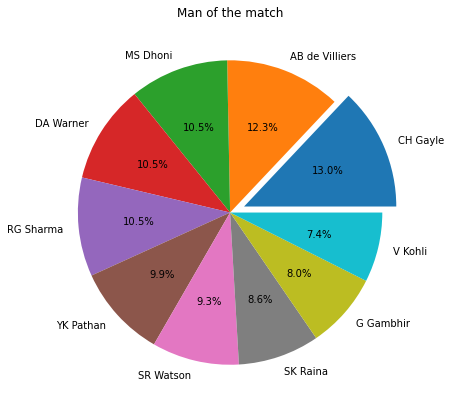

In [23]:
fig = plt.figure(figsize =(10, 7))
z=z[0:10];
y=y[0:10];
explode = (0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0)
plt.pie(z, labels = y,explode=explode, autopct='%1.1f%%')
plt.title("Man of the match")

plt.show()

# 4) Stadium Hosting Maximum Number of Matches

In [24]:
stadium_with_max_host=matches.venue.mode()
stadium_with_max_host

0    Eden Gardens
dtype: object

In [15]:
x=matches.groupby('venue')['venue'].count().sort_values(ascending=False)
y=x.index
z=x.values

x = x.reset_index(name="count")
x['count']=x['count'].astype(int)
x=x[0:5]
x
project.save_data(file_name='stadium_with_max_no_of_matches.csv',data=x.to_csv())

{'file_name': 'stadium_with_max_no_of_matches.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'ibmhc2021-donotdelete-pr-b4rupmtzwrnsav',
 'asset_id': 'd95aab14-e20d-497b-869e-36db9ef614c1'}

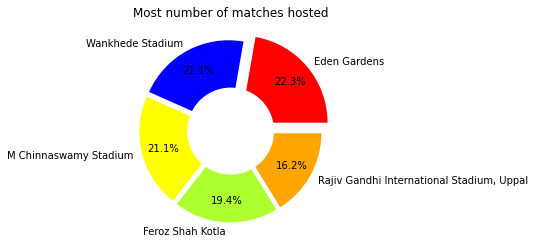

In [26]:
import matplotlib.pyplot as plt
# colors
colors =['#FF0000', '#0000FF', '#FFFF00', '#ADFF2F', '#FFA500']
  
# explosion
explode = (0.15, 0.05, 0.05, 0.05, 0.05)
z=z[0:5]  
y=y[0:5]
# Pie Chart
plt.pie(z, colors=colors, labels=y,
        autopct='%1.1f%%', pctdistance=0.75, 
        explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Most number of matches hosted')
  
# Displaing Chart
plt.show()

# 5) Teams Victory Per Season

In [8]:
teams_victory_per_season = matches.groupby('season')['winner'].value_counts().sort_index()
teams_victory_per_season.head(15)

teams_victory_per_season = teams_victory_per_season.reset_index(name="count")
teams_victory_per_season['count']=teams_victory_per_season['count'].astype(int)
teams_victory_per_season
project.save_data(file_name='teams_victory_per_season.csv',data=teams_victory_per_season.to_csv())

{'file_name': 'teams_victory_per_season.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'ibmhc2021-donotdelete-pr-b4rupmtzwrnsav',
 'asset_id': '35aadba9-3de7-4ad6-89cb-f77132579e3c'}

In [29]:
y=teams_victory_per_season.index
z=teams_victory_per_season.values
Chennai_Super_Kings=[]
Deccan_Chargers=[]
Delhi_Daredevils=[]
Kings_XI_Punjab=[]
Kolkata_Knight_Riders=[]
Mumbai_Indians=[]
Rajasthan_Royals=[]
Royal_Challengers_Bangalore=[]
b=int(len(z)/8)
for i in range(0,b+1):
    Chennai_Super_Kings.append(z[i+0])
    Deccan_Chargers.append(z[i+1])
    Delhi_Daredevils.append(z[i+2])
    Kings_XI_Punjab.append(z[i+3])
    Kolkata_Knight_Riders.append(z[i+4])
    Mumbai_Indians.append(z[i+5])
    Rajasthan_Royals.append(z[i+6])
    Royal_Challengers_Bangalore.append(z[i+7]) 

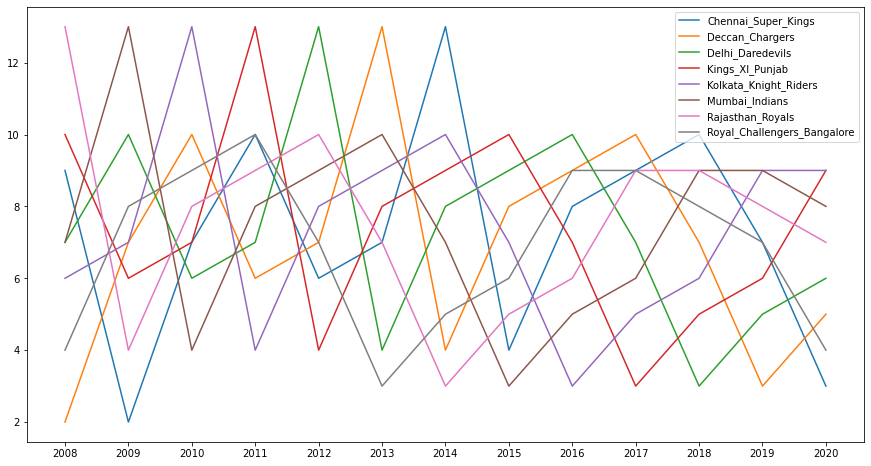

In [30]:
x=['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
plt.figure(figsize=(15,8))
plt.plot(x,Chennai_Super_Kings, label = "Chennai_Super_Kings")
plt.plot(x,Deccan_Chargers, label = "Deccan_Chargers")
plt.plot(x,Delhi_Daredevils, label = "Delhi_Daredevils")
plt.plot(x,Kings_XI_Punjab, label = "Kings_XI_Punjab")
plt.plot(x,Kolkata_Knight_Riders, label = "Kolkata_Knight_Riders")
plt.plot(x,Mumbai_Indians, label = "Mumbai_Indians")
plt.plot(x,Rajasthan_Royals, label = "Rajasthan_Royals")
plt.plot(x,Royal_Challengers_Bangalore, label = "Royal_Challengers_Bangalore")
plt.legend()
plt.show()

# 6) To find the biggest victories in IPL while defending a total and chasing a total

In [31]:
x =  matches['win_by_wickets'].max()
print("Biggest Victories while chasing\n")
for i in range(0,len(matches)):
    if(matches['win_by_wickets'][i]==x):
        winner=matches['winner'][i];
        if(winner!=matches['team1'][i]):
            loser=matches['team1'][i]
        else:
            loser=matches['team2'][i]
        print(winner,"won against",loser,"by",x,"wickets in the year",matches['season'][i])

Biggest Victories while chasing

Kolkata Knight Riders won against Gujarat Lions by 10 wickets in the year 2017
Kings XI Punjab won against Delhi Daredevils by 10 wickets in the year 2017
Deccan Chargers won against Mumbai Indians by 10 wickets in the year 2008
Delhi Daredevils won against Kings XI Punjab by 10 wickets in the year 2009
Royal Challengers Bangalore won against Rajasthan Royals by 10 wickets in the year 2010
Rajasthan Royals won against Mumbai Indians by 10 wickets in the year 2011
Mumbai Indians won against Rajasthan Royals by 10 wickets in the year 2012
Chennai Super Kings won against Kings XI Punjab by 10 wickets in the year 2013
Royal Challengers Bangalore won against Delhi Daredevils by 10 wickets in the year 2015
Sunrisers Hyderabad won against Gujarat Lions by 10 wickets in the year 2016
Royal Challengers Bangalore won against Kings XI Punjab by 10 wickets in the year 2018


In [32]:
x =  matches['win_by_runs'].max()
print("Biggest Victories while defending\n")
for i in range(0,len(matches)):
    if(matches['win_by_runs'][i]==x):
        winner=matches['winner'][i];
        if(winner!=matches['team1'][i]):
            loser=matches['team1'][i]
        else:
            loser=matches['team2'][i]
        print(winner,"won against",loser,"by",x,"runs in the year",matches['season'][i])

Biggest Victories while defending

Mumbai Indians won against Delhi Daredevils by 146 runs in the year 2017


In [7]:
data = [[146]]
 
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Runs'])
df.head()
project.save_data(file_name='biggest_victory_chasing_a_total.csv',data=df.to_csv())

{'file_name': 'biggest_victory_chasing_a_total.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'ibmhc2021-donotdelete-pr-b4rupmtzwrnsav',
 'asset_id': '58613856-3bdd-4342-8645-3a24e207651a'}

# 7) List of teams which have won matches by most runs cummulatively

In [11]:
x =  matches.groupby('winner')['win_by_runs'].count().sort_values(ascending=False)
x
x = x.reset_index(name="max_runs")
x['max_runs']=x['max_runs'].astype(int)
x
project.save_data(file_name='matches_won_most_runs_cummulatively.csv',data=x.to_csv())

,winner,max_runs
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Rising Pune Supergiants,15


In [35]:
print(x.index[0],"has won matches with highest runs spared being",x.values[0],"runs")

Mumbai Indians has won matches with highest runs spared being 109 runs


# 8) Winning a toss increases probability?

In [9]:
yes=0
no=0
for i in range(0,len(matches)):
    if(matches['toss_winner'][i]==matches['winner'][i]):
        yes+=1;
    else:
        no+=1;
print("Percentage of winning toss and winning the match is ",yes*100/len(matches),'percentage')
print("Percentage of winning toss and not winning the match is ",no*100/len(matches),'percentage')

Percentage of winning toss and winning the match is  51.98412698412698 percentage
Percentage of winning toss and not winning the match is  48.01587301587302 percentage


fig = plt.figure(figsize =(5, 5))
z=[yes,no]
y=["Yes","No"]
explode=(0.05,0.0)
plt.pie(z, labels = y,explode=explode,autopct='%1.1f%%')
plt.title("Winning Toss and Winning Match")
plt.show()

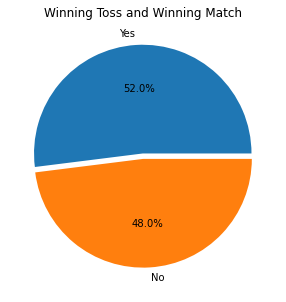

In [12]:
fig = plt.figure(figsize =(5, 5))
z=[yes,no]
y=["Yes","No"]
explode=(0.05,0.0)
plt.pie(z, labels = y,explode=explode,autopct='%1.1f%%')
plt.title("Winning Toss and Winning Match")
plt.show()

In [18]:
data = [[yes],[no]]
 
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['WinningTossWinningMatch'])
df.head()
project.save_data(file_name='does_winning_toss_lead_to_winning_match1.csv',data=df.to_csv())

{'file_name': 'does_winning_toss_lead_to_winning_match1.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'ibmhc2021-donotdelete-pr-b4rupmtzwrnsav',
 'asset_id': '1206c8f7-3a35-411e-aba5-c94990ca7e43'}

# 9) Batting/Fielding first and Winning the match?

In [21]:
yes=[];
for i in range(0,len(matches)):
    if(matches['toss_decision'][i]=="bat"):
        bat=matches['toss_winner'][i];
    elif(matches['toss_winner'][i]!=matches['team1'][i]):
        bat=matches['team1'][i];
    else:
        bat=matches['team2'][i];
    if(matches['winner'][i]==bat):
        yes.append(bat)

from collections import defaultdict
counter=defaultdict(int)
for item in yes:
    counter[item]+=1

inverted_dict = dict([[v,k] for k,v in counter.items()])
df = pd.DataFrame(columns = ['Team','Count'])
print("Teams batting first and winning the game")
for count in sorted(inverted_dict.keys()):
    df = df.append({'Team' : inverted_dict[count], 'Count' : count}, 
                ignore_index = True)
    print (inverted_dict[count],count)

project.save_data(file_name='teams_batting_first_winning_game.csv',data=df.to_csv())

Teams batting first and winning the game
Gujarat Lions 1
Kochi Tuskers Kerala 2
Delhi Capitals 3
Rising Pune Supergiants 5
Pune Warriors 6
Deccan Chargers 18
Delhi Daredevils 25
Rajasthan Royals 29
Sunrisers Hyderabad 30
Kolkata Knight Riders 34
Royal Challengers Bangalore 35
Kings XI Punjab 38
Chennai Super Kings 51
Mumbai Indians 58


{'file_name': 'teams_batting_first_winning_game.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'ibmhc2021-donotdelete-pr-b4rupmtzwrnsav',
 'asset_id': 'd000c6b4-f809-495f-8eaf-be1f79ddba3a'}

In [23]:
yes=[];
for i in range(0,len(matches)):
    if(matches['toss_decision'][i]=="field"):
        field=matches['toss_winner'][i];
    elif(matches['toss_winner'][i]!=matches['team1'][i]):
        field=matches['team1'][i];
    else:
        field=matches['team2'][i];
    if(matches['winner'][i]==bat):
        yes.append(field)

from collections import defaultdict
counter=defaultdict(int)
for item in yes:
    counter[item]+=1

inverted_dict = dict([[v,k] for k,v in counter.items()])
df = pd.DataFrame(columns = ['Team','Count'])

print("Teams fielding first and winning the game")
for count in sorted(inverted_dict.keys()):
    df = df.append({'Team' : inverted_dict[count], 'Count' : count}, 
                ignore_index = True)
    print (inverted_dict[count],count)

project.save_data(file_name='teams_fielding_first_winning_game.csv',data=df.to_csv())

Teams fielding first and winning the game
Delhi Capitals 1
Sunrisers Hyderabad 3
Deccan Chargers 4
Kings XI Punjab 5
Rajasthan Royals 6
Royal Challengers Bangalore 8
Delhi Daredevils 9
Chennai Super Kings 10
Mumbai Indians 51


{'file_name': 'teams_fielding_first_winning_game.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'ibmhc2021-donotdelete-pr-b4rupmtzwrnsav',
 'asset_id': '25d96758-1be4-4240-abd9-0cd30af8b156'}

# 10) Winning toss,chosing to bat/bowl and win the match

In [5]:
yes=0
no=0
for i in range(0,len(matches)):
    if(matches['toss_winner'][i]==matches['winner'][i] and matches['toss_decision'][i]=="bat"):
        yes+=1
    else:
        no+=1
print("Percentage of winning toss,batting first and winning the match is ",yes*100/len(matches),'percentage')
print("Percentage of winning toss,batting first and not winning the match is ",no*100/len(matches),'percentage')

Percentage of winning toss,batting first and winning the match is  17.724867724867725 percentage
Percentage of winning toss,batting first and not winning the match is  82.27513227513228 percentage


In [6]:
data = [[yes],[no]]
 
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['WinningTossBattingFirstWinningMatch'])
df.head()
project.save_data(file_name='winning_toss_batting_first_winning_match.csv',data=df.to_csv())

{'file_name': 'winning_toss_batting_first_winning_match.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'ibmhc2021-donotdelete-pr-b4rupmtzwrnsav',
 'asset_id': 'b559cdc3-c031-444b-9ac8-abd83355eeae'}

In [41]:
yes=[]
for i in range(0,len(matches)):
    if(matches['toss_winner'][i]==matches['winner'][i] and matches['toss_decision'][i]=="bat"):
        yes.append(matches['winner'][i]);
        
from collections import defaultdict
counter=defaultdict(int)
for item in yes:
    counter[item]+=1

inverted_dict = dict([[v,k] for k,v in counter.items()])
print("Teams winning toss,batting first and winning the match")
for count in sorted(inverted_dict.keys()):
    print (inverted_dict[count],count)

Teams winning toss,batting first and winning the match
Delhi Capitals 1
Pune Warriors 3
Kings XI Punjab 6
Sunrisers Hyderabad 8
Royal Challengers Bangalore 9
Deccan Chargers 11
Kolkata Knight Riders 15
Mumbai Indians 25
Chennai Super Kings 30


In [7]:
yes=0
no=0
for i in range(0,len(matches)):
    if(matches['toss_winner'][i]==matches['winner'][i] and matches['toss_decision'][i]=="field"):
        yes+=1;
    else:
        no+=1;
print("Percentage of winning toss,fielding first and winning the match is ",yes*100/len(matches),'percentage')
print("Percentage of winning toss,fielding first and not winning the match is ",no*100/len(matches),'percentage')

Percentage of winning toss,fielding first and winning the match is  34.25925925925926 percentage
Percentage of winning toss,fielding first and not winning the match is  65.74074074074075 percentage


In [8]:
data = [[yes],[no]]
 
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['WinningTossFieldingFirstWinningMatch'])
df.head()
project.save_data(file_name='winning_toss_fielding_first_winning_match.csv',data=df.to_csv())

{'file_name': 'winning_toss_fielding_first_winning_match.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'ibmhc2021-donotdelete-pr-b4rupmtzwrnsav',
 'asset_id': '6817cb77-5628-47a5-afd9-8cb0889b461e'}

In [43]:
yes=[]
for i in range(0,len(matches)):
    if(matches['toss_winner'][i]==matches['winner'][i] and matches['toss_decision'][i]=="field"):
        yes.append(matches['winner'][i]);
        
from collections import defaultdict
counter=defaultdict(int)
for item in yes:
    counter[item]+=1

inverted_dict = dict([[v,k] for k,v in counter.items()])
print("Teams winning toss,fielding first and winning the match")
for count in sorted(inverted_dict.keys()):
    print (inverted_dict[count],count)

Teams winning toss,fielding first and winning the match
Kochi Tuskers Kerala 4
Delhi Capitals 6
Deccan Chargers 8
Gujarat Lions 10
Sunrisers Hyderabad 15
Delhi Daredevils 24
Chennai Super Kings 27
Kings XI Punjab 29
Mumbai Indians 31
Royal Challengers Bangalore 32
Kolkata Knight Riders 38
